## Comenzando a modelar con Scikit-Learn

El más sencillo de los problemas y con el cual siempre se comienza en el mundo del machine learning es la **regresión lineal**.

Una regresión lineal es un enfoque lineal para modelar la relación entre una variable escalar dependiente **y** y una o más variables explicativas (o variables independientes).

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

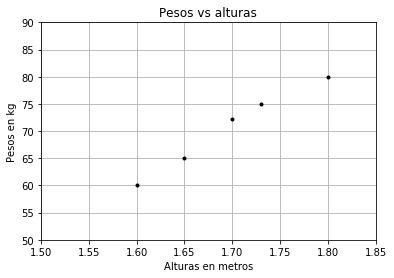

In [16]:
heights = [[1.6], [1.65], [1.7], [1.73], [1.8]] # alturas en m

weights = [[60], [65], [72.3], [75], [80]] # esos en Kg

plt.title("Pesos vs alturas")
plt.xlabel("Alturas en metros")
plt.ylabel("Pesos en kg")
plt.plot(heights,weights,'k.')

plt.axis([1.5, 1.85,50, 90]) # rangos de valores: xi,xf , yi,yf
plt.grid(True)

Se observa una relación lineal entre la talla y el peso de una persona, entonces podemos "predecir" o estimar el peso de una persona si tenemos su altura.

### Usando la clase regresión lineal para ajustar el modelo

Queremos trazar una recta que pase por todos los puntos o almenos que se acerque lo más posible a cada uno de ellos, esto podemos hacerlo con la librería Scikit-Learn en especifico con clase LinearRegression.

In [17]:
from sklearn.linear_model import LinearRegression

Tenemos primero que definir que modelo queremos , en este caso una regresión lineal ( LinearRegression ) y luego modelamos con los datos que poseemos, en nuestro caso **heights** y **weights**.

In [18]:
model = LinearRegression()
model.fit(X = heights, y = weights)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

Observar como heights tiene dos dimensiones (5,1), y tambien weight!

In [20]:
checkheights = np.array(heights)
checkheights.shape

(5, 1)

In [21]:
checkweights = np.array(weights)
checkweights.shape

(5, 1)

Esto se debe a que la función fit requiere tanto los argumentos X e Y requiere que sean bidimensionales.

### Haciendo predicciones

Una vez ya ajustado nuestro modelo con los datos podemos realizar predicciones de la siguiente manera.

In [24]:
weight = model.predict([[1.75]])[0][0]
round(weight,2) # mostramos con una aproximación de 2 digitos

76.04

Como vimos se puede realizar predicciones con la funcion predict y pasandole una variable tipo bidimensional.
Aqui se observa como para un tamaño de 1.75 m una persona pesará alrededor de 76.04 kg.

### Graficando una linea de regresión lineal

Como siempre debemos gráficar nuestro modelo para tener una visión más clara de lo que esta sucediendo.

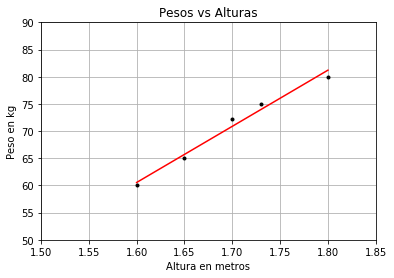

In [25]:
plt.title("Pesos vs Alturas")
plt.xlabel("Altura en metros")
plt.ylabel("Peso en kg")
plt.grid(True)

plt.axis([1.5, 1.85, 50, 90])
plt.plot(heights, weights, 'k.')
plt.plot(heights, model.predict(heights), color = 'r')

### Obteniendo el gradiente e interceptandolo con la linea de Regresión lineal

Debido a que si bien la linea muestra como se acerca a los puntos no sabemos exactamente en que valor la recta se intersecta con el eje y, y esto es debido a que nuestro dato comienza desde 1.60 pero podemos solucionarlo de la siguiente manera:

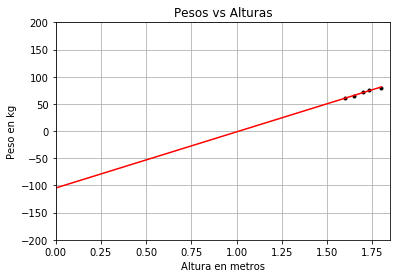

In [34]:
plt.title("Pesos vs Alturas")
plt.xlabel("Altura en metros")
plt.ylabel("Peso en kg")
plt.grid(True)

plt.plot(heights, weights, 'k.') # k. indica punto con punto (no linea)
plt.axis([0,1.85, -200,200])

extreme_heights = [[0], [1.8]]
plt.plot(extreme_heights, model.predict(extreme_heights), color = 'r') # una linea

In [37]:
model.predict(extreme_heights) # vemos que es bidimensional , si queremos el valor en si mismo agregamos [0][0] 
                               # como lo hizimos previamente

array([[-104.75454545],
       [  81.20428816]])

Intersección con el eje y en ...

In [43]:
round(model.predict([[0]])[0][0],2)

-104.75

O tambien podemos usar

In [49]:
round(model.intercept_[0],2) # de nuevo ponemos 0 para quedarnos con el valor en si mismo y no un array

-104.75

Y obtenemos la gradiente de esta manera:

In [50]:
round(model.coef_[0],2)

103.31